Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 131
Code Title: | Advance Machine Learning  and Deep Learning
1st Semester | AY 2024-2025
<u>**ACTIVITY NO.** | **TITLE**
**Name** | De los Reyes, Jann Moises Nyll B.
**Section** | CPE32S3
**Date Performed**: | February 21, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


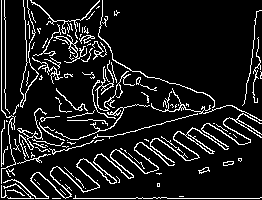

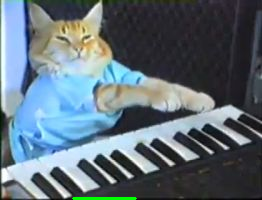

In [2]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/CVdata/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

<font color = orange> 1. The `cv2.HoughLinesP` is responsible for setting the minimum line length in our code. We first initialize our minimum line length to 20 then pass it to the `cv2.HoughLinesP` process.

<font color = orange> 2. The mathematical equation for the Hough Transform is:


```
d = x*cos(theta) + y*sin(theta)
```
<font color =orange> `d` is the perpendicular distance from te origin to the line, `theta`is the angle of the line, and `x,y` are the coordinates of points on the line. The process of finding lines using the Hough Transform starts with edge detection, commonly using an algorithm like Canny, to identify potential edge points in the image. Each edge point in the image is then transformed into a curve in the `(ρ, θ)` parameter space. This transformation means that each edge point contributes to multiple possible lines passing through it, represented by different `ρ` and `θ` values.

<font color= orange>An accumulator array is used to count the number of votes for each possible line, and the peaks in this array correspond to the lines that best fit the points in the image. Finally, the detected `(ρ, θ)` pairs are mapped back into the image space to draw the lines, resulting in a robust detection of lines even in noisy images or those with gaps. This method allows for accurate identification and representation of lines in the original image.



### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

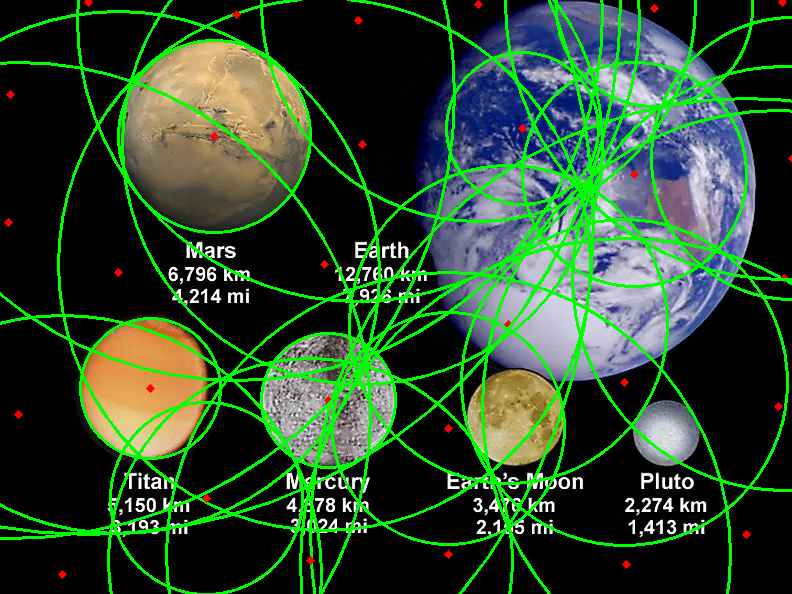

In [3]:
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/drive/MyDrive/CVdata/planet.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

<font color = orange> Based on the result of our program, the value
 `n=5` detect a lot of circles and false positive which is not suitable for detecting  6 circles. Incrementing the number can enhance our program to reduce the noise it cand detect

Change the value to 9, **what happens to the image**?

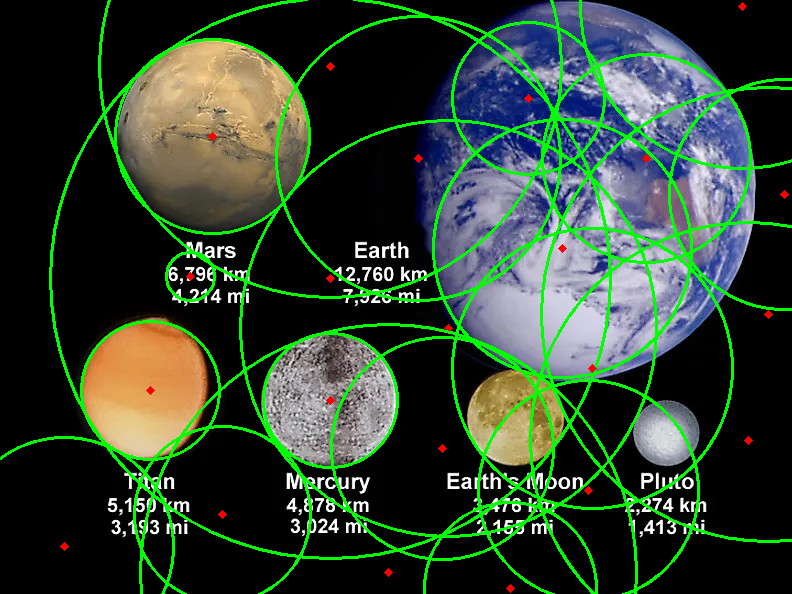

In [4]:
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/drive/MyDrive/CVdata/planet.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles2.jpg", planets)
cv2_imshow(planets)

<font color = orange> Having a value =`9` in our n parameter decrease the number of circle it detected from the previous code. But as we can see in the output, the result of the changed value had a noise, resulting to false positive  detection of our program.

Lastly, change the value to 15, **what can you say about the resulting image?**

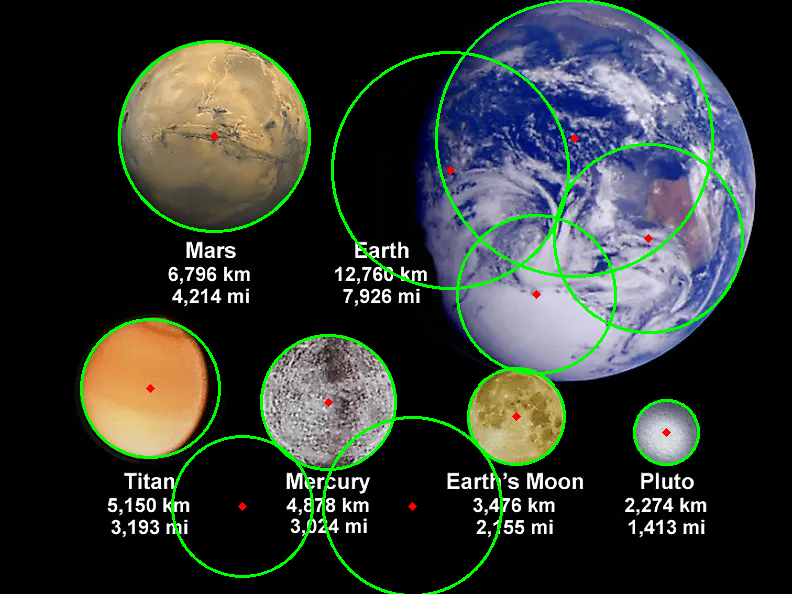

In [10]:
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/CVdata/planet.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

<font color = orange> The output of the circle detection when the value is 15 is remarkable as it not only lessen the noise of detection but also  accurately detect 5 of our circles. With minimal false positive for a much larger circle

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

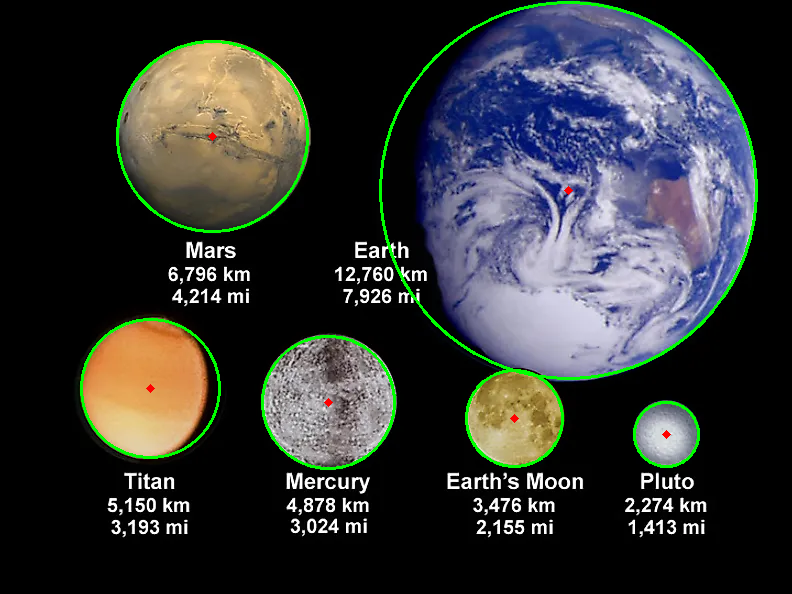

In [9]:
import cv2
import numpy as np

# Our testing value
n = 19

planets = cv2.imread('/content/drive/MyDrive/CVdata/planet.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles3.jpg", planets)
cv2_imshow(planets)

<font color = orange> The output of the circle detection with 19 as a value of n completely recognized all the circle without false postive.
This mean 19 is the best value for this type of detection.

As we observe in the exercises, change the n parameter in our detection model will detect more accurate and raise the treshold before it considered to be a circle.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

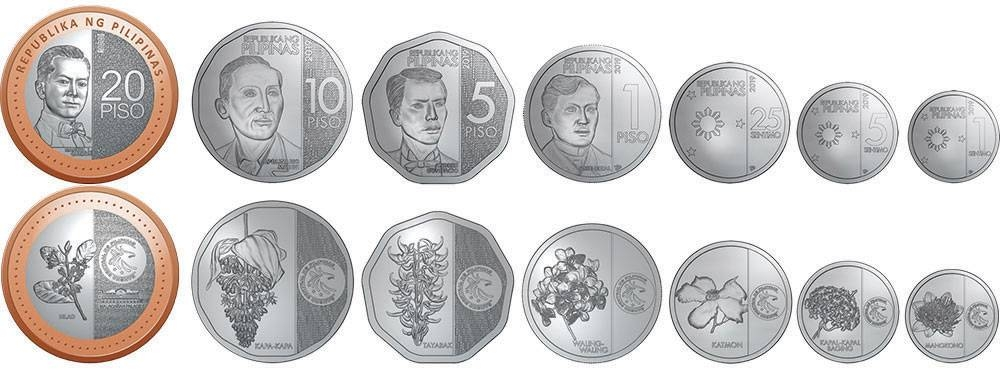

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

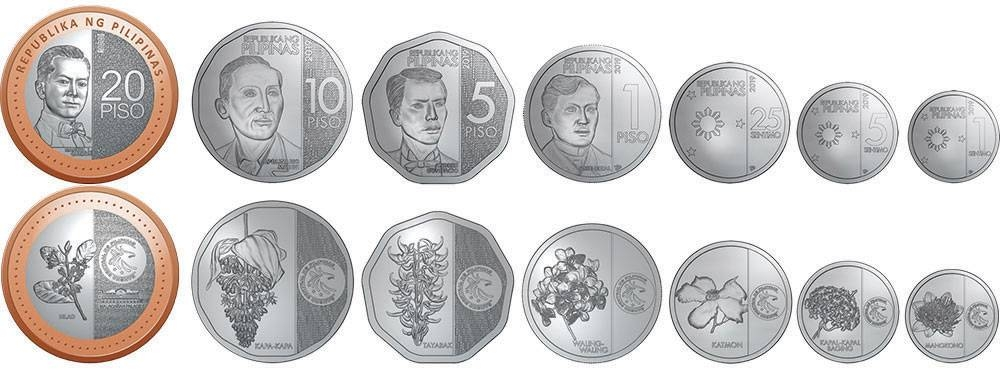

In [58]:
coins_img = cv2.imread('/content/drive/MyDrive/CVdata/coins.jpg')
cv2_imshow(coins_img)

##Line detection using Hough Line

In [59]:
def LineDetection(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  edges = cv2.Canny(gray, 50, 200, apertureSize=3)
  minLineLength = 20
  maxLineGap = 5
  lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength, maxLineGap)

  for x1,y1,x2,y2 in lines[0]:
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)

  cv2_imshow(edges)

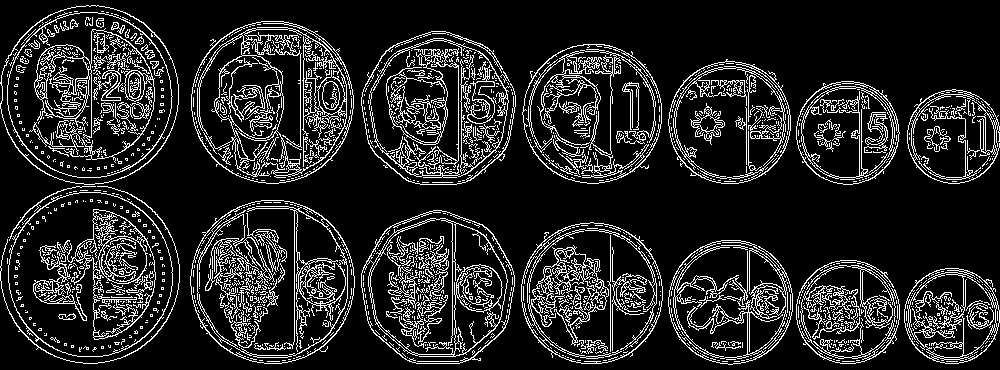

In [60]:
LineDetection(coins_img)

<font color = orange> The output of the line detection function we created is similar to Canny Edge Algorithm. We cannot count the circle using this function since it only detects edges of the lines in the image using Hough Transform equation.

## Coin Detection using HoughCircle

In [139]:
def CircleDetection(img,n=21):
  src = img.copy()
  gray_img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  img = cv2.medianBlur(gray_img, n)
  cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
  circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                             param1=100,param2=30,minRadius=0,
                             maxRadius=0)

  circles = np.uint16(np.around(circles))

  for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(src,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(src,(i[0],i[1]),2,(0,0,255),3)
  cv2_imshow(src)
  print("Total Circles:", len(circles[0]))

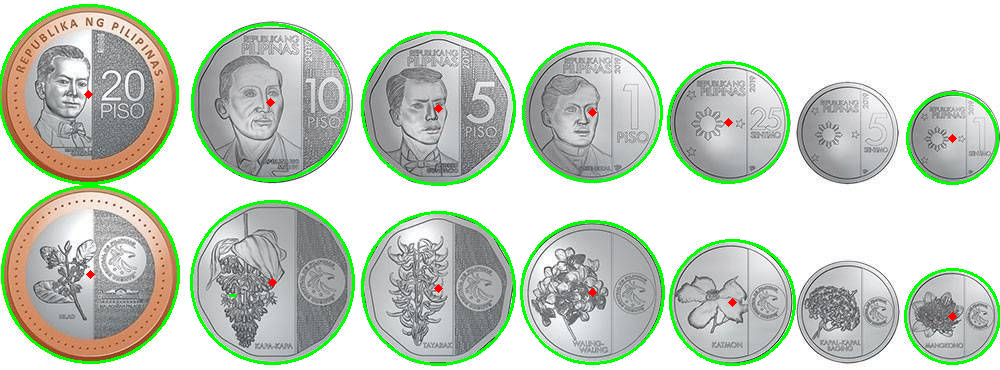

Total Circles: 12


In [140]:
CircleDetection(coins_img)

<font color = orange> The output of the line detection function we created is similar to Contour Edge Algorithm. We can count the circle using this function since it easily detect the shape of our image using HoughCircle function, allowing more parameter to recognize the shape of our object.

## 5. Summary, Conclusions and Lessons Learned

<font color = green> In this notebook we explore various Line and Circle edge Algorithm works in detecting an object. We also discuss how the Hodge Transform Equation works in detecting lines for more easier recognition of our objects. The most challenging part of this activity is setting the parameters for detecting our circle since we have many parameter to consider and we need to determine the right value of our parameter for effective recognition of our program to the image we provide.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*